In [165]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

In [166]:
pip install dmba # 오류 해결 : No module named 'dmba'

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


# 16.1 9/11 사태로 인한 미국 항공기 여행 여파

In [167]:
bts = pd.read_csv('Sept11Travel.csv')
bts = bts.rename(columns = {'Month-Year':'Day'}) # 이름 변경해줌
bts.head(5)

,Day,AirRPM,RailPM,VMT_billions
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


In [168]:
bts.Day.info # object 형에서 day 형으로 변경해야 함

<bound method Series.info of 0      Jan-90
1      Feb-90
2      Mar-90
3      Apr-90
4      May-90
        ...  
167     3-Dec
168     4-Jan
169     4-Feb
170     4-Mar
171     4-Apr
Name: Day, Length: 172, dtype: object>

In [169]:
# [0:120]은 월 - 년도 / 나머지는 년도 - 월 로 구성됨 
# 9/11 전의 데이터를 이용해 테러 공격이 없다는 가정하여 미래의 데이터를 예측
# 시계열 데이터를 전과 후로 나눠 아래는 p_bts 전의 데이터
p_bts = bts.iloc[0:120]
p_bts

,Day,AirRPM,RailPM,VMT_billions
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88
...,...,...,...,...
115,Aug-99,63752132,528001216,242.57
116,Sep-99,53733696,393137094,225.30
117,Oct-99,57407208,425897553,234.66
118,Nov-99,53866781,421595015,222.83


In [170]:
p_bts['Day']=pd.to_datetime(p_bts.Day, format='%b-%y')
p_bts

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2516\398678094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_bts['Day']=pd.to_datetime(p_bts.Day, format='%b-%y')


,Day,AirRPM,RailPM,VMT_billions
0,1990-01-01,35153577,454115779,163.28
1,1990-02-01,32965187,435086002,153.25
2,1990-03-01,39993913,568289732,178.42
3,1990-04-01,37981886,568101697,178.68
4,1990-05-01,38419672,539628385,188.88
...,...,...,...,...
115,1999-08-01,63752132,528001216,242.57
116,1999-09-01,53733696,393137094,225.30
117,1999-10-01,57407208,425897553,234.66
118,1999-11-01,53866781,421595015,222.83


### a

9.11 사태의 영향을 파악하기 위해 이전 데이터로 미래 데이터를 예측하고 여파를 살펴보았으니 예측적 분석이라고 생각된다.

앞 시점의 데이터를 이용해 모델 구축, 뒤 시점의 데이터로 구축된 모델의 성능 평가

##### 변화에 목적이 있기에 탐색적 목적.

### b

#### 1

64397523
29672427


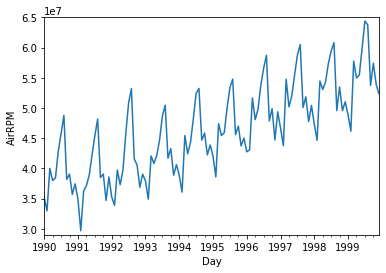

In [171]:
## 항공기 시계열 데이터

# convert dataframe column to series (name is used to label the data)
pbts_Airrpm = pd.Series(p_bts.AirRPM.values, index=p_bts.Day, name='AirRPM')

# define the time series frequency
pbts_Airrpm.index = pd.DatetimeIndex(pbts_Airrpm.index, freq=pbts_Airrpm.index.inferred_freq)

# y 축 범위 조정을 위해 최댓값 및 최솟값 구하기
print(p_bts.AirRPM.max())
print(p_bts.AirRPM.min())

ax = pbts_Airrpm.plot()
ax.set_xlabel('Day')
ax.set_ylabel('AirRPM')
_ = ax.set_ylim(29000000, 65000000)

plt.show()

In [172]:
# convert dataframe column to series (name is used to label the data)
pbts_Railpm = pd.Series(p_bts.RailPM.values, index=p_bts.Day, name='RailPM')

# define the time series frequency
pbts_Railpm.index = pd.DatetimeIndex(pbts_Railpm.index, freq=pbts_Railpm.index.inferred_freq)

# y 축 범위 조정을 위해 최댓값 및 최솟값 구하기
print(p_bts.RailPM.max())
print(p_bts.RailPM.min())


664013874
326874247


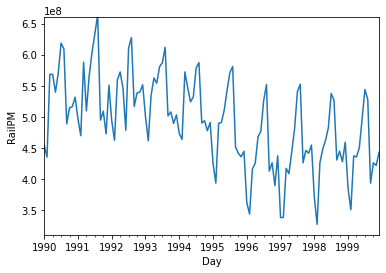

In [173]:
ax = pbts_Railpm.plot()
ax.set_xlabel('Day')
ax.set_ylabel('RailPM')
_ = ax.set_ylim(310000000, 660000000)

plt.show()

In [174]:
# convert dataframe column to series (name is used to label the data)
pbts_VMT_billions = pd.Series(p_bts.VMT_billions.values, index=p_bts.Day, name='VMT_billions')

# define the time series frequency
pbts_VMT_billions.index = pd.DatetimeIndex(pbts_VMT_billions.index, freq=pbts_VMT_billions.index.inferred_freq)

# y 축 범위 조정을 위해 최댓값 및 최솟값 구하기
print(p_bts.VMT_billions.max())
print(p_bts.VMT_billions.min())

244.2
153.25


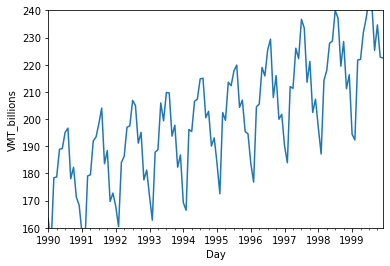

In [175]:
ax = pbts_VMT_billions.plot()
ax.set_xlabel('Day')
ax.set_ylabel('VMT_billions')
_ = ax.set_ylim(160, 240)

plt.show()

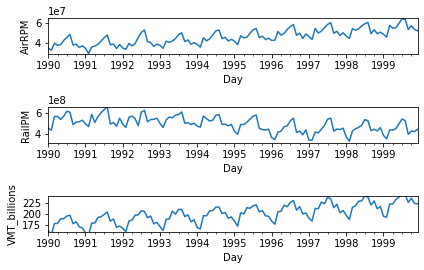

In [176]:
# 위의 시계열 그래프 한번에 항공기 철도 자동차 순서대로 나열하는 경우

fig, axes = plt.subplots(nrows=3, ncols=1)

pbts_Airrpm.plot(ax=axes[0])
axes[0].set_xlabel('Day')
axes[0].set_ylabel('AirRPM')
_ = axes[0].set_ylim(29000000, 65000000)

pbts_Railpm.plot(ax=axes[1])
axes[1].set_xlabel('Day')
axes[1].set_ylabel('RailPM')
_ = axes[1].set_ylim(310000000, 660000000)

pbts_VMT_billions.plot(ax=axes[2])
axes[2].set_xlabel('Day')
axes[2].set_ylabel('VMT_billions')
_ = axes[2].set_ylim(160, 240)


plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

#### 2

 어떤 종류의 추세로 보임
 스케일 변화 / 추세선 첨가 / 계절 변동 제거

1.  변동 점점 커짐 
2. 지수적 추세, 변동 불규칙 
3. 변동 일정

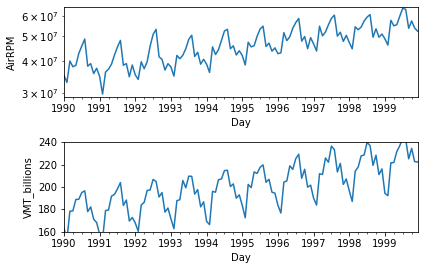

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=1)

pbts_Airrpm.plot(ax=axes[0])
axes[0].set_xlabel('Day')
axes[0].set_ylabel('AirRPM')
axes[0].set_yscale('log')
_ = axes[0].set_ylim(29000000, 65000000)


pbts_VMT_billions.plot(ax=axes[1])
axes[1].set_xlabel('Day')
axes[1].set_ylabel('VMT_billions')
_ = axes[1].set_ylim(160, 240)


plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

In [178]:
##???? 변동은 적용하는게 쉬운데 trend 는 어떻게 적용하지

# convert dataframe column to series (name is used to label the data)
pbts_Railpm = pd.Series(p_bts.RailPM.values, index=p_bts.Day, name='RailPM')

# define the time series frequency
pbts_Railpm.index = pd.DatetimeIndex(pbts_Railpm.index, freq=pbts_Railpm.index.inferred_freq)


pbts_Railpm.plot(ax=axes[1])
axes[1].set_xlabel('Day')
axes[1].set_ylabel('RailPM')
axes[0].set_yscale('log')

_ = axes[1].set_ylim(310000000, 660000000)

# 16.2 학습 데이터와 검증 데이터에 각각 적용 시 모델 성능

모델의 과적합을 피하고 미래 데이터에 대한 예측력을 계산하기 위해 학습 데이터와 검증데이터의 분할 필요

시간 순서대로 데이터 분할

앞 시점의 데이터를 이용해 모델 구축, 뒤 시점의 데이터로 구축된 모델의 성능 평가

### a

검증데이터가 많은 모델 A가 적합하다고 생각함

### b

앞 시점의 데이터를 이용해 모델을 구축하니 데이터가 많을수록 이득이라 생각해 학습데이터가 많은 모델 B가 적합하다고 생각함

# 16.3 백화점 매출 예측

### a

In [179]:
departss = pd.read_csv('DepartmentStoreSales.csv')

In [180]:
departss.Quarter = pd.to_datetime(departss.Quarter, format='%d') # 분기니까 일로 변환하여 적용하는 것이 간단할 것이라 생각

In [181]:
# y 축 범위 조정을 위해 최댓값 및 최솟값 구하기
print(departss.Sales.max(),'  ', departss.Sales.min())

103337    48617


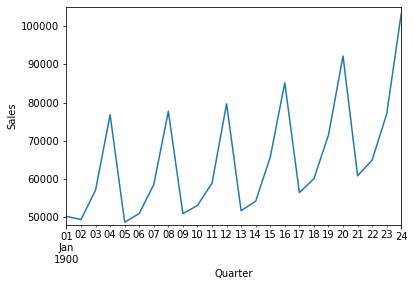

In [182]:
# convert dataframe column to series (name is used to label the data)
de_Sales = pd.Series(departss.Sales.values, index=departss.Quarter, name='Sales')

# define the time series frequency
de_Sales.index = pd.DatetimeIndex(de_Sales.index, freq=de_Sales.index.inferred_freq)

ax = de_Sales.plot()
ax.set_xlabel('Quarter')
ax.set_ylabel('Sales')
_ = ax.set_ylim(48000, 105000) 
plt.show()

### b

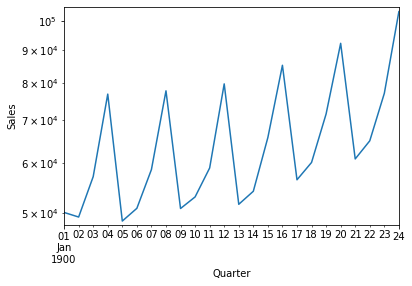

In [183]:
# 시간에 따라 분산 즉, 변동이 커지는 것을 확인할 수 있다. 잡음은 있다고 보기 어려움


ax = de_Sales.plot()
ax.set_xlabel('Quarter')
ax.set_ylabel('Sales')

ax.set_yscale('log') # 원래 x축도 로그변환 적용해야 하나

_ = ax.set_ylim(48000, 105000) 
plt.show()


# 16.4 가전제품 선적량

### a

In [238]:
As = pd.read_csv('ApplianceShipments.csv')

In [239]:
As

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123
5,Q2-1986,4522
6,Q3-1986,4657
7,Q4-1986,4030
8,Q1-1987,4493
9,Q2-1987,4806


In [186]:
As['day']=pd.date_range("1985-1-1", "1989-12-31", freq=" Q-JAN")

In [187]:
As.day.info # 분기 변경하는 방법 몰라서 주기기준으로 그냥 새로운 열을 만들었음

<bound method Series.info of 0    1985-01-31
1    1985-04-30
2    1985-07-31
3    1985-10-31
4    1986-01-31
5    1986-04-30
6    1986-07-31
7    1986-10-31
8    1987-01-31
9    1987-04-30
10   1987-07-31
11   1987-10-31
12   1988-01-31
13   1988-04-30
14   1988-07-31
15   1988-10-31
16   1989-01-31
17   1989-04-30
18   1989-07-31
19   1989-10-31
Name: day, dtype: datetime64[ns]>

In [188]:
print(As.Shipments.max(),'\t', As.Shipments.min())

4900 	 3944


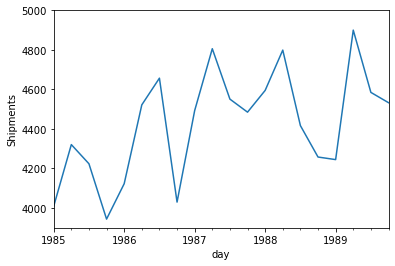

In [189]:
# convert dataframe column to series (name is used to label the data)
ass = pd.Series(As.Shipments.values, index=As.day, name='Shipments')

# define the time series frequency
ass.index = pd.DatetimeIndex(ass.index, freq=ass.index.inferred_freq)

ax = ass.plot()
ax.set_xlabel('day')
ax.set_ylabel('Shipments')
_ = ax.set_ylim(3900, 5000) 
plt.show()

### b

완전.. 이상하다.. 추세가 지수적이지도 않고 선형성 있다고 보는건가...

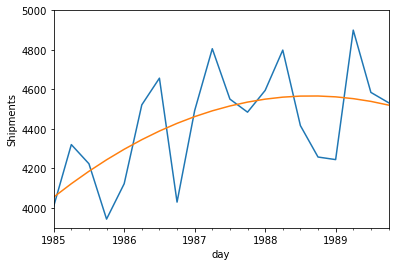

In [190]:
# create a data frame with additional independent variables from time series
# the following command adds a constant term, a trend term and a quadratic trend term
As_df = tsatools.add_trend(ass, trend='ctt')

# fit a linear regression model to the time series
As_lm = sm.ols(formula='Shipments ~ trend + trend_squared', data=As_df).fit()


# plot the series
ax = ass.plot()
ax.set_xlabel('day')
ax.set_ylabel('Shipments')
_ = ax.set_ylim(3900, 5000)

As_lm.predict(As_df).plot()

plt.show()

# 선형성만 판단해주는 것 같고 좋지 않은 추세임은 알 수 있다. 평균을 구하기도 어려움?


# 16.5 캐나다 제조업체 종사자의 근무시간

### a

In [191]:
cwh = pd.read_csv('CanadianWorkHours.csv')

In [192]:
cwh['Year']=pd.to_datetime(cwh.Year, format='%Y')

cwh.head(5)

,Year,Hours
0,1966-01-01,37.2
1,1967-01-01,37.0
2,1968-01-01,37.4
3,1969-01-01,37.5
4,1970-01-01,37.7


In [193]:
print(cwh.Hours.max(),'\t', cwh.Hours.min())

37.7 	 34.8


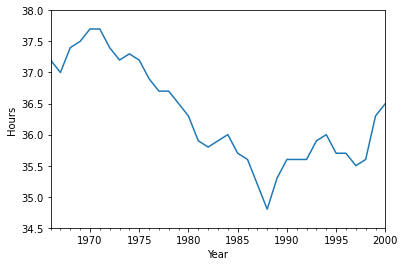

In [194]:
# convert dataframe column to series (name is used to label the data)
cwh_h = pd.Series(cwh.Hours.values, index=cwh.Year, name='Hours')

# define the time series frequency
cwh_h.index = pd.DatetimeIndex(cwh_h.index, freq=cwh_h.index.inferred_freq)

ax = cwh_h.plot()
ax.set_xlabel('Year')
ax.set_ylabel('Hours')
_ = ax.set_ylim(34.5, 38)

plt.show()

### b

전반적으로 감소하는 추세이긴 하나 1980년도 말에 다시 증가하는 형태로 볼 수 있다.
계절성이 있다고 보기는 어렵다.
주기도 있다고 보기는 어렵지만,, 굳이 따져보자면 급감하는 구간과 급증하는 구간으로 나눠서 생각해볼 수 있다.
분산의 문제라기 보다는 차분의 문제로 보인다.

# 16.6 기념품 판매량

# 본 데이터가 손실

### a

In [209]:
ss = pd.read_csv('SouvenirSales.csv')

In [210]:
ss=ss.drop(columns={'Unnamed: 2', 'From website'})

In [211]:
ss.head(5)

,Date,Sales
0,Jan-95,1664.81
1,Feb-95,2397.53
2,Mar-95,2840.71
3,Apr-95,3547.29
4,May-95,3752.96


In [221]:
ss

,Date,Sales
0,1995-01-01,1664.81
1,1995-02-01,2397.53
2,1995-03-01,2840.71
3,1995-04-01,3547.29
4,1995-05-01,3752.96
...,...,...
79,2001-08-01,28586.52
80,2001-09-01,30505.41
81,2001-10-01,30821.33
82,2001-11-01,46634.38


In [212]:
ss['Date']=pd.to_datetime(ss.Date, format='%b-%y')

In [213]:
print(ss.Sales.max(),'\t', ss.Sales.min())

104660.67 	 1664.81


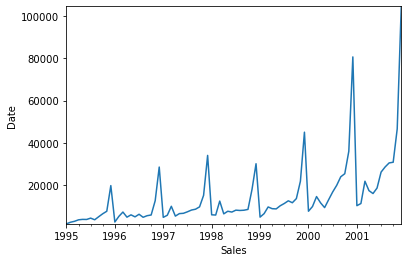

In [215]:
# convert dataframe column to series (name is used to label the data)
sss = pd.Series(ss.Sales.values, index=ss.Date, name='Sales')

# define the time series frequency
sss.index = pd.DatetimeIndex(sss.index, freq=sss.index.inferred_freq)

ax = sss.plot()
ax.set_xlabel('Sales')
ax.set_ylabel('Date')
_ = ax.set_ylim(1660, 104670)

plt.show()

### b

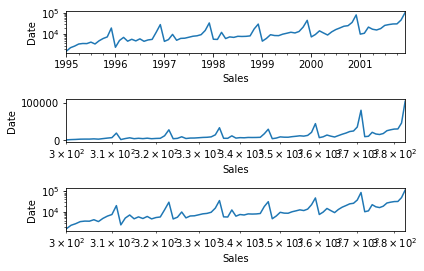

In [219]:
fig, axes = plt.subplots(nrows=3, ncols=1)


# y축 로그변환

sss.plot(ax=axes[0])
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Date')
axes[0].set_yscale('log')
_ = ax.set_ylim(1660, 104670)

# x축 로그변환

sss.plot(ax=axes[1])
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Date')
axes[1].set_xscale('log')
_ = ax.set_ylim(1660, 104670)

# x, y축 로그변환

sss.plot(ax=axes[2])
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Date')
axes[2].set_xscale('log')
axes[2].set_yscale('log')
_ = ax.set_ylim(1660, 104670)


plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

변동의 폭이 일정한 것이 좋은 시계열이라 볼 수 있으니까 x축 로그변환 제외하고 둘다 괜찮은 것으로 보인다. 

그래도 굳이 선형을 따지자면..y축 로그변환 

### c

증가하는 추세

### d

In [222]:
# 모델의 과적합을 피하고 미래 데이터에 대한 예측력을 계산하기 위해 학습 데이터와 검증데이터의 분할 필요

# 시간 순서대로 데이터 분할

# 앞 시점의 데이터를 이용해 모델 구축, 뒤 시점의 데이터로 구축된 모델의 성능 평가

# 앞 데이터가 학습, 뒷 데이터가 검증이라 생각함

In [230]:
ss[ss['Date']=='2001-01-01']

,Date,Sales
72,2001-01-01,10243.24


In [232]:
T_ss=ss.iloc[:72]

In [234]:
V_ss=ss.iloc[72:]

# 16.7 샴푸 판매량 예측

### a

In [224]:
shampoo = pd.read_csv('ShampooSales.csv')

In [226]:
shampoo

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [236]:
shampoo['month']=pd.date_range("2022-1-1", "2024-12-31", freq="M")

In [237]:
shampoo.head(5)

,Month,Sales,month
0,1-01,266.0,2022-01-31
1,1-02,145.9,2022-02-28
2,1-03,183.1,2022-03-31
3,1-04,119.3,2022-04-30
4,1-05,180.3,2022-05-31


### b

### c

### d

### e